In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms,models
import cv2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
def get_model():
  model=models.vgg16(pretrained=True)
  for param in model.parameters():
    param.requires_grad=False
  model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
  model.classifier = nn.Sequential(nn.Flatten(),
                                   nn.Linear(512, 100),
                                   nn.ReLU(),
                                   nn.Dropout(0.3),
                                   nn.Linear(100, 1),
                                   nn.Sigmoid())
  return model.to(device)

In [3]:
model=get_model()
state_dict = torch.load(r'D:\ML_Projects_PyTorch\Mask_Detector_PyTorch\Code_Files\Mask_Detector.pth')
model.load_state_dict(state_dict)
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
from numpy import moveaxis
from numpy import asarray

In [5]:
def detect_class(img1):
    img1=cv2.resize(img1, (224, 224))
    data=asarray(img1)
    data=moveaxis(data, 2, 0)
    img2=torch.tensor(data/255).view(-1, 3, 224, 224).float().to(device)
    TF=transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    img2=TF(img2)
    np_output=model(img2)
    np_output=np_output.detach().cpu().numpy()
    np_output=np_output.reshape(-1)
    if (np_output[0]<0.5):
        return 0
    elif (np_output>0.5):
        return 1

C:\Users\ROHIT MANDAL\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


1

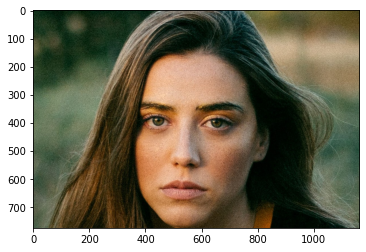

In [6]:
img1=cv2.imread(r'D:\ML_Projects_PyTorch\Mask_Detector_PyTorch\checking_pictures\No_Mask.jpg')
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
detect_class(img1)

0

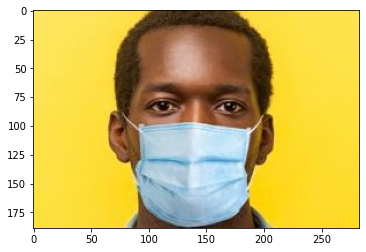

In [7]:
img1=cv2.imread(r'D:\ML_Projects_PyTorch\Mask_Detector_PyTorch\checking_pictures\Wearing_Mask.jpg')
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
detect_class(img1)

In [8]:
Face_Cascade=cv2.CascadeClassifier(r'D:\ML_Projects_PyTorch\Mask_Detector_PyTorch\haarcascade_frontalface_default.xml')

In [9]:
def detect(grey, original_image):
    faces=Face_Cascade.detectMultiScale(grey, 1.3, 5)
    for (x, y, w, h) in faces:
        sub_colour=original_image[y:y+h, x:x+w]
        img=sub_colour
        pred=detect_class(img)
        print(pred)
        if(pred==0):
            cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(original_image, "Mask", (x, y+h), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        elif(pred==1):
            cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(original_image, "No Mask", (x, y+h), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    return original_image

In [10]:
Video_Capture=cv2.VideoCapture(0)
while True:
    im, original=Video_Capture.read()
    grey=cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    canvas=detect(grey, original)
    cv2.imshow('Video_Display', canvas)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
Video_Capture.release()
cv2.destroyAllWindows()

1
1
1
1
1
0
0
1
0
0
0
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
